-------------------------------------------------QUESTION 1---------------------------------------------------------

Data cleaned. Number of records now: 712
Removed 179 records due to missing values.


-------------------------------------------------QUESTION 2--------------------------------------------------------- 

The train picked most passengers from S station, with 554 passengers.


-------------------------------------------------QUESTION 3---------------------------------------------------------

First five records of the dataset:
   survived  pclass   age  sibsp  parch     fare  sex_male  station_Q  \
0         0       3  22.0      1      0   7.2500      True      False   
1         1       1  38.0      1      0  71.2833     False      False   
2         1       3  26.0      0      0   7.9250     False      False   
3         1       1  35.0      1      0  53.1000     False      False   
4         0       3  35.0      0      0   8.0500      True      False   

   station_S 

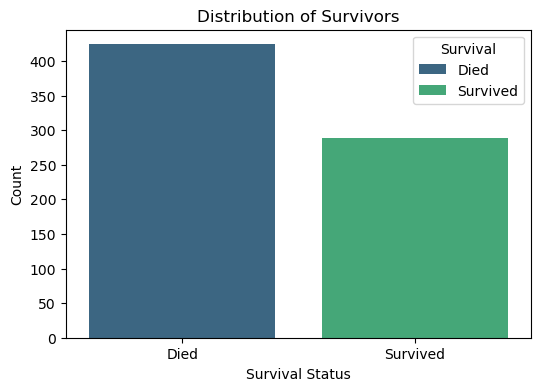

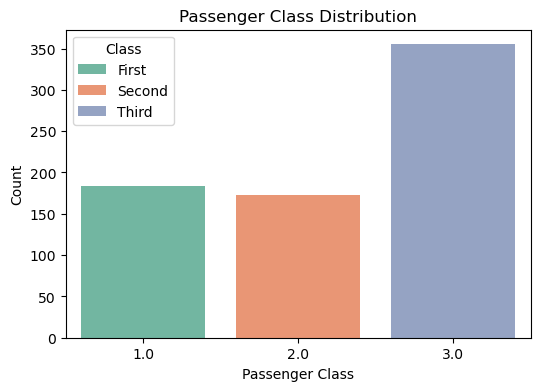

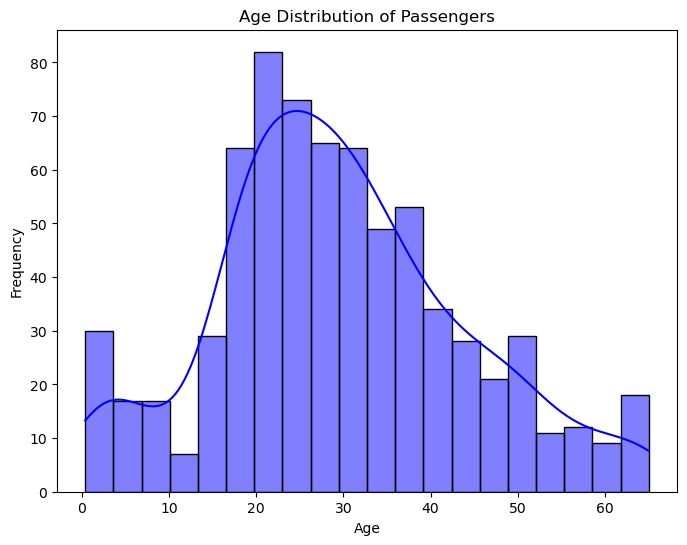

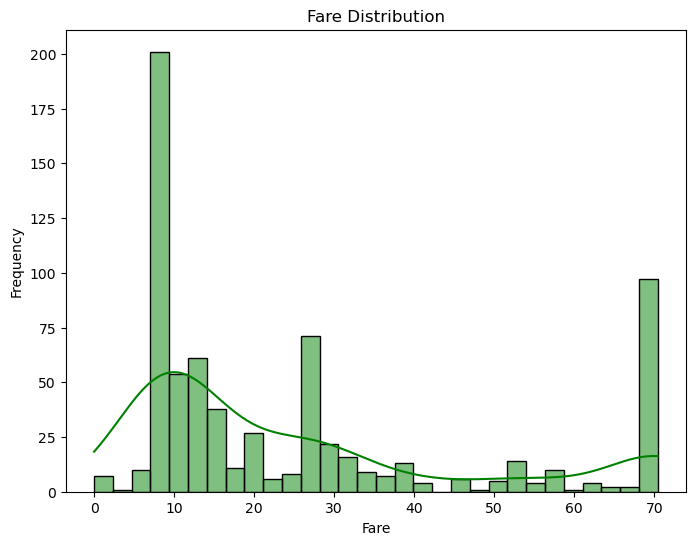

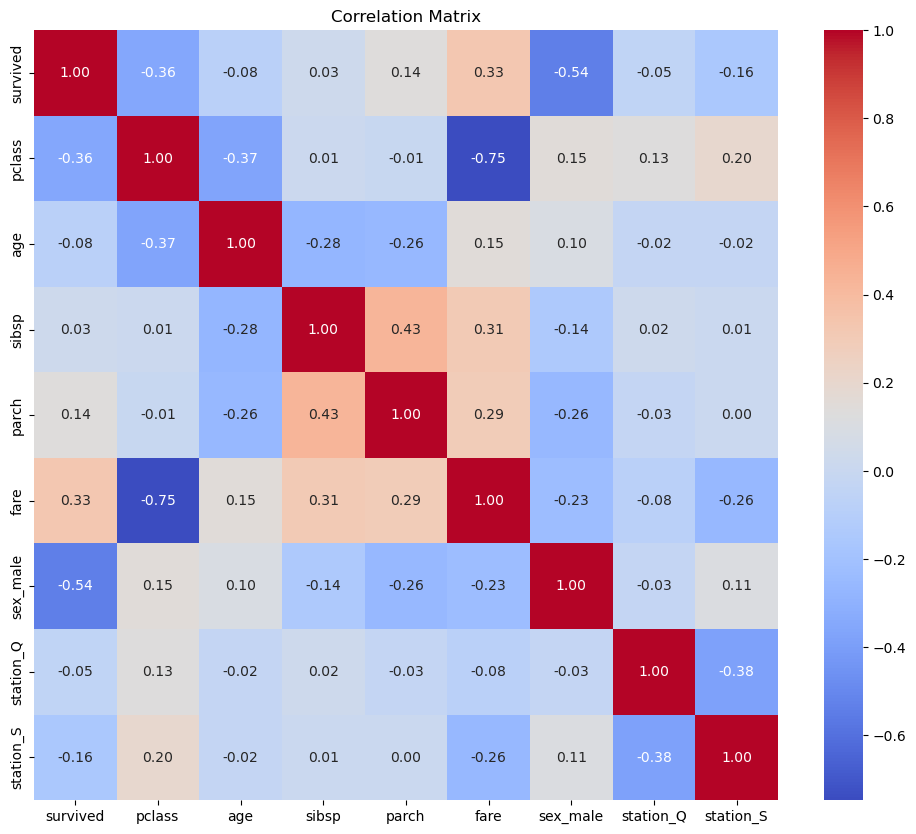



Survival Bar Chart: The second image showcases the survival distribution, with more people not surviving the incident. It highlights the stark reality of the survival chances.
Passenger Class Distribution: The third graph illustrates the count of passengers in each class, revealing a majority in third class, which might correlate with the economic status of the passengers.
Age Distribution: The fourth image shows the age distribution of passengers with a histogram, suggesting a young passenger demographic, predominantly between 20 and 30 years old.
Fare Histogram: The last graph represents the fare distribution, with most passengers paying lower fares, again pointing to the socio-economic status, and a few outliers paying significantly higher fares, possibly correlating to higher survival rates as seen in the correlation heatmap.
Correlation Matrix: The first image displays a correlation matrix between all variables, indicating that fare and passenger class are notably inversely rela

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns


class TrainDataAnalysis:
    def __init__(self, filepath):
        print('-------------------------------------------------QUESTION 1---------------------------------------------------------\n')
        self.data = pd.read_csv(filepath)
        self.clean_data()


    def clean_data(self):
        original_count = self.data.shape[0]
        self.data.dropna(inplace=True)
        cleaned_count = self.data.shape[0]
        print(f"Data cleaned. Number of records now: {cleaned_count}")
        print(f"Removed {original_count - cleaned_count} records due to missing values.")
        print('\n')
        
        if 'sex' in self.data.columns:
            self.data = pd.get_dummies(self.data, columns=['sex'], drop_first=True)


    def most_popular_station(self):
        print('-------------------------------------------------QUESTION 2--------------------------------------------------------- \n')
        if 'station' in self.data.columns:
            station_counts = self.data['station'].value_counts()
            most_popular = station_counts.idxmax()
            num_passengers = station_counts.max()
            return most_popular, num_passengers
        else:
            return "Station data is not available."

    def encode_additional_features(self):
        self.data = pd.get_dummies(self.data, columns=['station'], drop_first=True)
        print('\n')

    def explore_data(self):
        print('-------------------------------------------------QUESTION 3---------------------------------------------------------\n')
        print("First five records of the dataset:")
        print(self.data.head())
        print("\nData Types and Missing Values:")
        print(self.data.info())
        print("\nStatistical Summary:")
        print(self.data.describe())
        print("\nUnique Values per Column:")
        for column in self.data.columns:
            print(f"{column}: {self.data[column].nunique()} unique values")
        print('\n')
        print('''Based on the data exploration results, all variables in the dataset could potentially contribute to the analysis, including 'station',
which might offer demographic insights. Variables like 'fare', despite high variance, and family-related features ('sibsp' and 'parch')
could be particularly relevant when correlated with passenger class or combined into a single 'family size' feature.
It is advisable to retain all variables for initial modeling efforts and use feature importance metrics from predictive models to make
informed decisions about excluding any variables later.''')
        print('\n')

    def detect_and_treat_outliers(self):
        print('-------------------------------------------------QUESTION 4---------------------------------------------------------\n')
        numerical_columns = self.data.select_dtypes(include=[np.number]).columns.tolist()
        for column in numerical_columns:
            Q1 = self.data[column].quantile(0.25)
            Q3 = self.data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            
            outliers = self.data[(self.data[column] < lower_bound) | (self.data[column] > upper_bound)]
            print(f"Outliers detected in {column}: {len(outliers)} entries")

          
            self.data[column] = np.where(self.data[column] < lower_bound, lower_bound, self.data[column])
            self.data[column] = np.where(self.data[column] > upper_bound, upper_bound, self.data[column])

        print("Outliers have been treated.")
        print('\n')

    def split_data(self, test_size=0.30, random_state=12345):
        print('-------------------------------------------------QUESTION 5---------------------------------------------------------\n')
        X = self.data.drop('survived', axis=1)
        y = self.data['survived']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state)
        print(f"Data split into training set ({len(self.X_train)} records) and testing set ({len(self.X_test)} records).")

        
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)
        print('\n')

    def train_and_evaluate_knn(self, max_k=20):
        print('-------------------------------------------------QUESTION 6---------------------------------------------------------\n')
        accuracies = []
        for k in range(1, max_k + 1):
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(self.X_train, self.y_train)
            y_pred = knn.predict(self.X_test)
            accuracy = accuracy_score(self.y_test, y_pred)
            accuracies.append((k, accuracy))

        best_k, best_accuracy = max(accuracies, key=lambda x: x[1])
        print(f"Best k: {best_k} with an accuracy of {best_accuracy:.2f}")
        print('\n')

    def train_and_evaluate_logistic_regression(self):
        print('-------------------------------------------------QUESTION 7---------------------------------------------------------\n')
        model = LogisticRegression()
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)
        print(f"Accuracy of Logistic Regression model: {accuracy:.2f}")
        print('\n')

    def train_and_evaluate_decision_tree(self, max_depth=None):
        print('-------------------------------------------------QUESTION 8---------------------------------------------------------\n')
        best_accuracy = 0
        best_depth = None
        for depth in range(1, 21):  
            tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
            tree.fit(self.X_train, self.y_train)
            y_pred = tree.predict(self.X_test)
            accuracy = accuracy_score(self.y_test, y_pred)
            print(f"Depth {depth}: Accuracy {accuracy:.2f}")
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_depth = depth

      
        tree_best = DecisionTreeClassifier(max_depth=best_depth, random_state=12345)
        tree_best.fit(self.X_train, self.y_train)
        y_pred_best = tree_best.predict(self.X_test)
        best_accuracy = accuracy_score(self.y_test, y_pred_best)
        print(f"Best Tree Depth: {best_depth} with an accuracy of {best_accuracy:.2f}")
        print('\n')
        print('''The best depth for a Decision Tree is found by balancing accuracy and simplicity. You want a tree that's deep enough to capture the right
details but not so deep that it starts to react to random noise in the data, which could mislead it when it sees new situations. Essentially, the ideal depth
is where the tree performs the best on new, unseen data without getting tripped up by the quirks of the data it was trained on. ''')
        print('\n')
        print('-------------------------------------------------QUESTION 9---------------------------------------------------------\n')
        print('\n')
        print('''The Decision Tree model, particularly at a depth of 6, exhibits the highest accuracy among the three models assessed, making it the frontrunner
for this classification task. Its accuracy surpasses both K-Nearest Neighbors and Logistic Regression, indicating its efficacy in capturing the underlying patterns
in the data. However, the interpretability of the Decision Tree diminishes with greater depth, potentially leading to overfitting. On the other hand,
Logistic Regression offers a balance between accuracy and interpretability, making it suitable for scenarios where understanding the relationship between features and
the target variable is crucial. Hence, while the Decision Tree may be the optimal choice for maximizing accuracy, logistic regression could be preferred in contexts
where interpretability and model maintenance are paramount considerations.''')
        print('\n')
        return best_depth, best_accuracy
        print('\n')

    def plot_survival_distribution(self):
        print('-------------------------------------------------QUESTION 10---------------------------------------------------------\n')
        plt.figure(figsize=(6, 4))
        sns.countplot(x='survived', data=self.data, palette='viridis', hue='survived', dodge=False)
        plt.title('Distribution of Survivors')
        plt.xlabel('Survival Status')
        plt.ylabel('Count')
        plt.xticks(ticks=[0, 1], labels=['Died', 'Survived'])
        plt.legend(title='Survival', loc='upper right', labels=['Died', 'Survived'])
        plt.show()

    def plot_passenger_class_distribution(self):
        print('\n')
        plt.figure(figsize=(6, 4))
        sns.countplot(x='pclass', data=self.data, palette='Set2', hue='pclass', dodge=False)
        plt.title('Passenger Class Distribution')
        plt.xlabel('Passenger Class')
        plt.ylabel('Count')
        plt.legend(title='Class', loc='upper left', labels=['First', 'Second', 'Third'])
        plt.show()

    def plot_age_distribution(self):
        print('\n')
        plt.figure(figsize=(8, 6))
        sns.histplot(self.data['age'], bins=20, kde=True, color='blue')
        plt.title('Age Distribution of Passengers')
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.show()

    def plot_fare_distribution(self):
        print('\n')
        plt.figure(figsize=(8, 6))
        sns.histplot(self.data['fare'], bins=30, kde=True, color='green')
        plt.title('Fare Distribution')
        plt.xlabel('Fare')
        plt.ylabel('Frequency')
        plt.show()

    def plot_correlation_matrix(self):
        print('\n')
        plt.figure(figsize=(12, 10))
        sns.heatmap(self.data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()
        print('\n')
        print('''Survival Bar Chart: The second image showcases the survival distribution, with more people not surviving the incident. It highlights the stark reality of the survival chances.
Passenger Class Distribution: The third graph illustrates the count of passengers in each class, revealing a majority in third class, which might correlate with the economic status of the passengers.
Age Distribution: The fourth image shows the age distribution of passengers with a histogram, suggesting a young passenger demographic, predominantly between 20 and 30 years old.
Fare Histogram: The last graph represents the fare distribution, with most passengers paying lower fares, again pointing to the socio-economic status, and a few outliers paying significantly higher fares, possibly correlating to higher survival rates as seen in the correlation heatmap.
Correlation Matrix: The first image displays a correlation matrix between all variables, indicating that fare and passenger class are notably inversely related, while survival has a moderate negative correlation with passenger class and a significant positive correlation with sex, implying women had a higher survival rate.''')
        print('\n')

filepath = (r"C:\Users\hp\Downloads\TrainData.csv")  
train_analysis = TrainDataAnalysis(filepath)
station, count = train_analysis.most_popular_station()
print(f"The train picked most passengers from {station} station, with {count} passengers.")
train_analysis.encode_additional_features()
train_analysis.explore_data()
train_analysis.detect_and_treat_outliers()
train_analysis.split_data()
train_analysis.train_and_evaluate_knn()
train_analysis.train_and_evaluate_logistic_regression()
best_depth, best_accuracy = train_analysis.train_and_evaluate_decision_tree()
train_analysis.plot_survival_distribution()
train_analysis.plot_passenger_class_distribution()
train_analysis.plot_age_distribution()
train_analysis.plot_fare_distribution()
train_analysis.plot_correlation_matrix()